<a href="https://colab.research.google.com/github/bgalerne/M1MAS_Stat_Images/blob/master/Multiclass_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Multiclass logistic regression
 Goal:
 1. Visualize a multi-class logisitc regression for 2D data
 2. Implement gradient descent
 3. Implement (averaged) stochastic gradient descent
 4. Recover the same result with PyTorch using a linear network and the torch.nn.CrossEntropyLoss

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(100, 2)
[2 2 0 0 1 0 0 1 1 0]


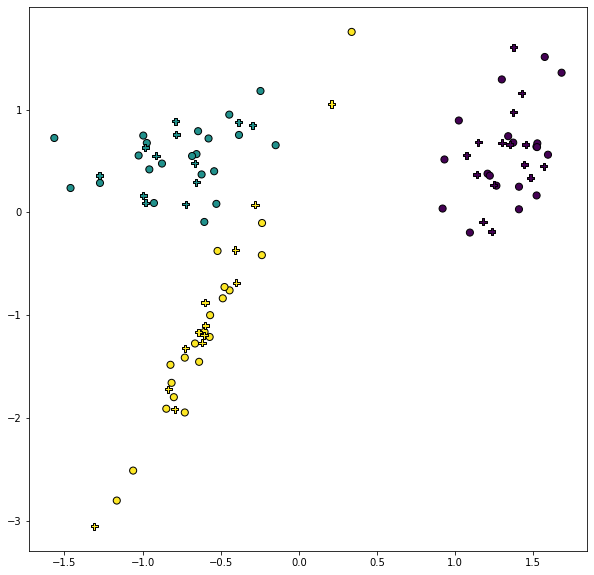

In [79]:
# create some toy datasets :

#
n_class = 3
X, t = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_classes=n_class, n_clusters_per_class=1)
X = StandardScaler().fit_transform(X)
print(X.shape)

#X, y = make_gaussian_quantiles(n_features=2, n_classes=3)


X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=.4, random_state=42)

figure = plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')


N_train = X_train.shape[0]
N_test = X_test.shape[0]

In [133]:
# Apply feature transform:

# Add the 1 coordinate for bias:
Phi_train = np.hstack( (X_train, X_train**2, np.ones((N_train,1))))
Phi_test = np.hstack( (X_test, X_test**2, np.ones((N_test,1))))
print(X_train[:3,:])
print(Phi_train.shape)
print(Phi_train[:3,:])

n_feat = Phi_train.shape[1]


[[-0.48636766 -0.83582518]
 [-0.23499918 -0.10249415]
 [ 1.208468    0.37790152]]
(60, 5)
[[-0.48636766 -0.83582518  0.2365535   0.69860372  1.        ]
 [-0.23499918 -0.10249415  0.05522462  0.01050505  1.        ]
 [ 1.208468    0.37790152  1.46039491  0.14280956  1.        ]]


In [0]:
# Function for Multiclass logistic regression:
# - W is the matrix of size n_feat x n_class

def soft_max(W, Phi):
  # evaluate the softmax vector for a list of feature points phi (given in line) 
  a = W.transpose() @ Phi.transpose() 
  y = np.exp(a)
  s = np.sum(y,axis=0)
  y = (y/s).transpose()
  return(y)

def predicted_class(W,Phi):
  y = soft_max(W, Phi)
  if Phi.ndim==1:
    pred = np.argmax(y)
  else:
    pred = np.argmax(y,axis=1)
  return(pred)

def mloglikelihood(W, Phi, t):
  y = soft_max(W, Phi)
  # extract values of softmax for the class k=t
  if t.ndim == 0:
    y = y[t]
    L = np.log(y)
  else:
    y = y[np.arange(Phi.shape[0]),t]
    L = - np.sum(np.log(y))
  return(L)

def gradmloglikelihood(W, Phi, t):
  y = soft_max(W, Phi)
  # extract values of softmax for the class k=t
  if t.ndim == 0:
    y[t] -= 1
    y.shape = (n_class,1)
    Phi.shape = (1,n_feat)
    g = y @ Phi
  else:
    y[np.arange(Phi.shape[0]),t] = y[np.arange(Phi.shape[0]),t] - 1
    #print(y.shape)
    #print(Phi.shape)
    g = y.transpose() @ Phi
  return(g.transpose())



In [0]:
W = np.random.random((n_feat,n_class))
print(W)
print('Tests of soft_max')
print(soft_max(W, Phi_train[0,:]))
print(soft_max(W, Phi_train[1,:]))
print(soft_max(W, Phi_train[0:2,:]))
print('\nTests of mloglikelihood')
print(mloglikelihood(W, Phi_train[0,:], t_train[0]))
print(mloglikelihood(W, Phi_train[0:2,:], t_train[0:2]))
print(mloglikelihood(W, Phi_train, t_train))
print('\nTests of gradmloglikelihood')
print(gradmloglikelihood(W, Phi_train, t_train))
print(gradmloglikelihood(W, Phi_train[0,:], t_train[0]))




In [132]:
lr = 0.1

Nit = 100
for n in range(Nit):
  W -= lr*gradmloglikelihood(W, Phi_train, t_train)
  print(mloglikelihood(W, Phi_train, t_train))



17.642431979013665
5.051934355802694
3.9326680926382402
3.4559629148489988
3.1962234704875887
3.025694021550776
2.898592342889348
2.796339207978476
2.7099330553165206
2.6343590514578827
2.5666122116363046
2.504818334391433
2.447765567802866
2.39463681186735
2.3448547108751865
2.297991558481538
2.2537164703497505
2.211763867681488
2.1719141917286695
2.133981719151943
2.0978065757675113
2.0632492928859185
2.030186948483477
1.998510328877532
1.968121770806385
1.938933473523267
1.910866146917473
1.883847907641856
1.8578133635476617
1.8327028446410272
1.808461750425926
1.785039991297164
1.7623915070197531
1.7404738491365126
1.7192478169123693
1.6986771384829005
1.6787281904399458
1.6593697502986706
1.640572777243357
1.6223102173086648
1.6045568297653876
1.5872890319784565
1.5704847604143228
1.5541233458136503
1.5381854008272982
1.5226527186497951
1.507508181383324
1.4927356770334508
1.4783200241805847
1.4642469034929781
1.4505027953512706
1.437074922944092
1.423951200271261
1.41112018455783

In [138]:
pred = predicted_class(W,Phi_test)
print(pred[:10])
print(t_test[:10])

[2 1 0 0 1 1 1 0 0 0]
[2 1 0 0 1 2 1 0 0 0]
